# GRIP : GRADUATE INTERNSHIP ROTATIONAL PROGRAM
# THE SPARKS FOUNDATION
# DATA SCIENCE AND BUSINESS ANALYTICS INTERN


# **AUTHOR: ISHA RANKA**
TASK 1: PREDICTION SUPERVISED ML
PREDICT THE SCORE OF STUDENT FROM NUMBER OF HOURS OF STUDY



In [1]:
#IMPORTING NECESAARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#DATA READ
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
#DISPLAY DATA
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#lets decribe the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#check for null values (sum)
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Lets visualize

Text(0.5, 1.0, 'hours vs scores')

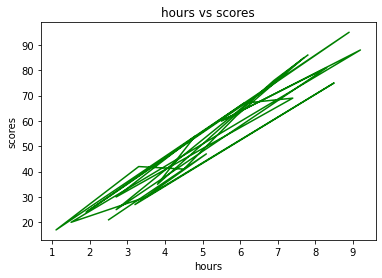

In [6]:
plt.plot(data['Hours'],data['Scores'],'g')
plt.xlabel('hours')
plt.ylabel('scores')
plt.title("hours vs scores")

Text(0.5, 1.0, 'hours vs scores')

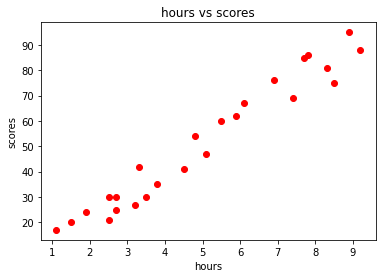

In [7]:
plt.plot(data['Hours'],data['Scores'],'ro')
plt.xlabel('hours')
plt.ylabel('scores')
plt.title("hours vs scores")

# its something like a linear trend

In [8]:
#CORRELATION MATRIX
cr= data.corr()

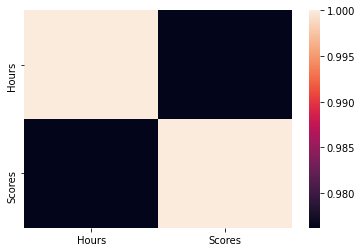

In [9]:
#HEATMAP FROM SEABORN LIBRARY
sns.heatmap(cr) 

# hours and salary are highly inversly correlated

In [10]:
# X IS INDEPENDENT VARIABLE(HOURS) AND Y IS DEPENDENT(SCORE)
X = data.iloc[:, :-1].values #feature (IV)
y = data.iloc[:, 1].values   #DV(Lable/ Output)

In [11]:
X #(hours of study)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y #(scores)

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

Text(0, 0.5, 'Salary')

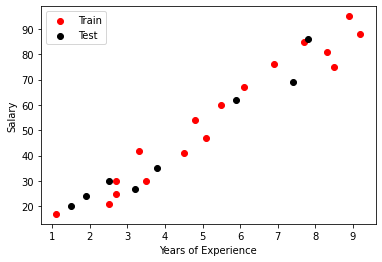

In [14]:
#VISUALIZE THE SPLIT
plt.scatter(X_train,y_train, color='red')
plt.scatter(X_test,y_test, color='black')
plt.legend(['Train','Test'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [15]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [16]:
lr= LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# linear regression (y=b0+b1*x) 
# b0- intercept
# b1- coefficient

In [18]:
lr.intercept_

2.3708153823418883

In [19]:
lr.coef_  

array([9.78856669])

# Predicting the Test set results

In [20]:
y_pred =lr.predict(X_test)

#comparing Actual vs Predicted

In [21]:
pd.DataFrame({'Actual_Test':y_test ,'Predicted':y_pred})

,Actual_Test,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Visualising the Training set results

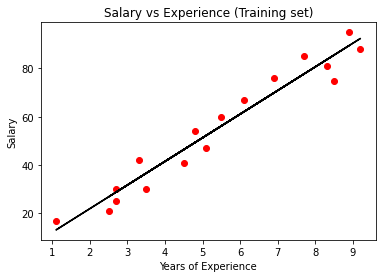

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the test set results

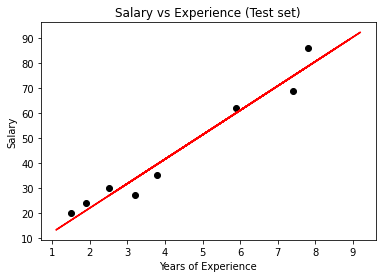

In [23]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the All results

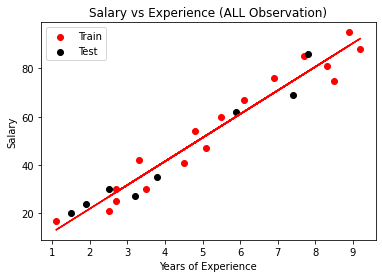

In [24]:
# Visualising the ALL results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'black')
plt.legend(['Train','Test'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Salary vs Experience (ALL Observation)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

#Evaluating model performance
#Root Mean Square Error(RMSE)
---



In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt


sqrt(mean_squared_error(y_test,y_pred))

4.7921912746363144

#i.e. average Error(difference b/w actual & predicted score) is 4.79.

***
#### R2 score
How good is our Line compare to Average Line anybody can think of. (How goo our model fitted)

##### R2 Closer to 1  ==>  our model is better.

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9568211104435257

In [27]:
#or 
lr.score(X_test,y_test)

0.9568211104435257

# prediction for 9.25 hours a day

In [28]:
print("The predicted score for 9.25 hours a day is",lr.predict([[9.25]]))

The predicted score for 9.25 hours a day is [92.91505723]


**Thank a lot!**